# Zillow Clustering Project 

##### Imports:

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Wrangle file to acquire and clean Zillow data
import wrangle_zillow as wr

## Acquire:

In [2]:
zillow = wr.wrangle_zillow()
zillow.head(3)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,0.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01,None,Orange
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,5.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,None,Ventura
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,6.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,None,Orange


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70838 entries, 0 to 77380
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   70838 non-null  float64
 1   bedroomcnt                    70838 non-null  float64
 2   calculatedfinishedsquarefeet  70838 non-null  float64
 3   fips                          70838 non-null  float64
 4   latitude                      70838 non-null  float64
 5   longitude                     70838 non-null  float64
 6   roomcnt                       70838 non-null  float64
 7   yearbuilt                     70838 non-null  float64
 8   structuretaxvaluedollarcnt    70838 non-null  float64
 9   taxvaluedollarcnt             70838 non-null  float64
 10  landtaxvaluedollarcnt         70838 non-null  float64
 11  taxamount                     70838 non-null  float64
 12  logerror                      70838 non-null  float64
 13  t

## Explore:

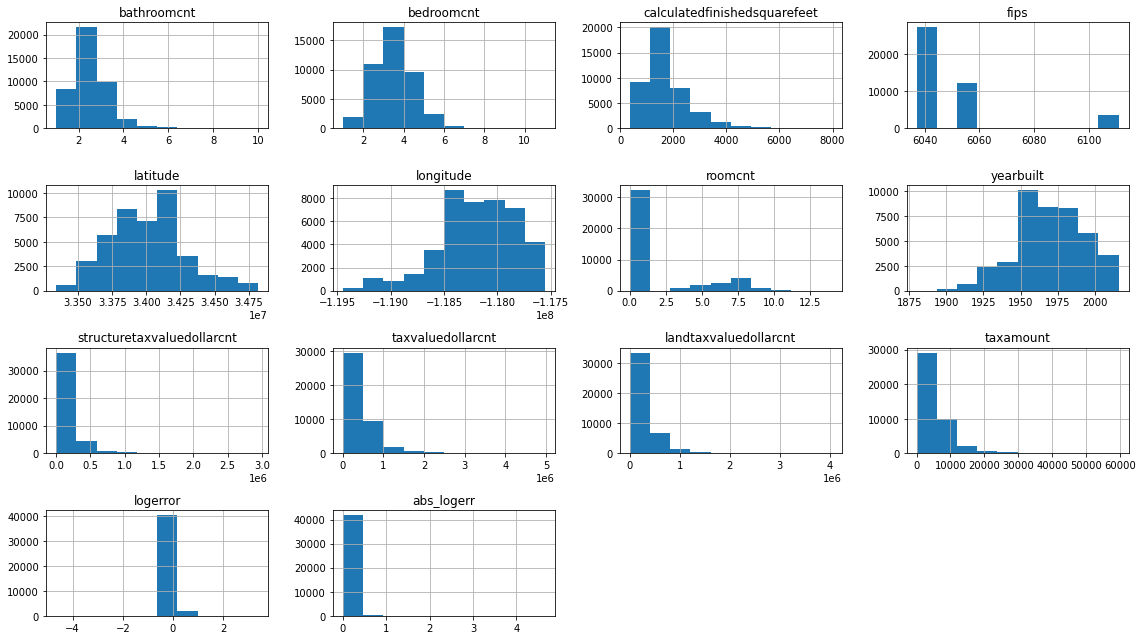

In [7]:
train.hist(figsize=(16,9))
plt.tight_layout()
plt.show()

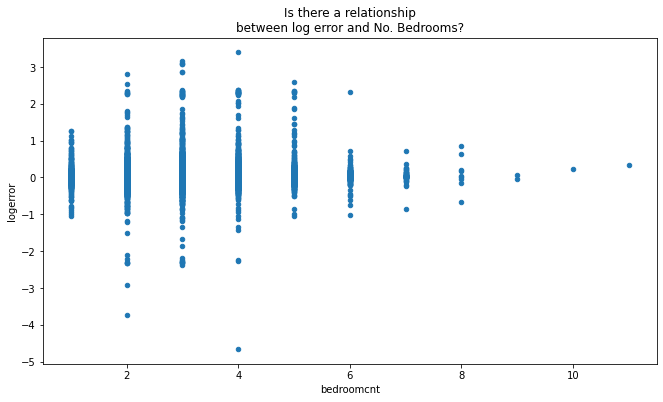

In [8]:
train.plot.scatter(
    x="bedroomcnt",
    y="logerror",
    title='Is there a relationship\nbetween log error and No. Bedrooms?',
    figsize=(11, 6),
)
plt.show()

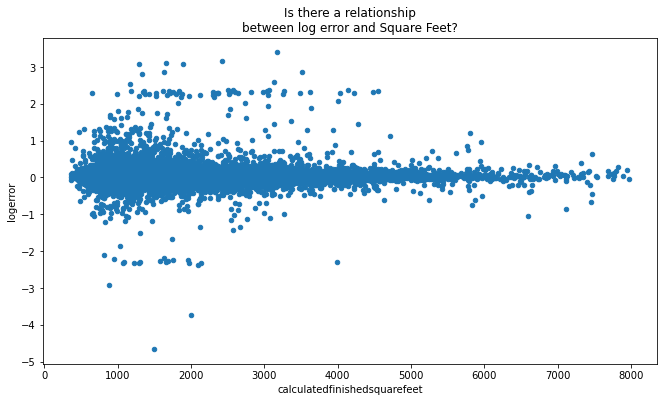

In [9]:
train.plot.scatter(
    x="calculatedfinishedsquarefeet",
    y="logerror",
    title='Is there a relationship\nbetween log error and Square Feet?',
    figsize=(11, 6),
)
plt.show()

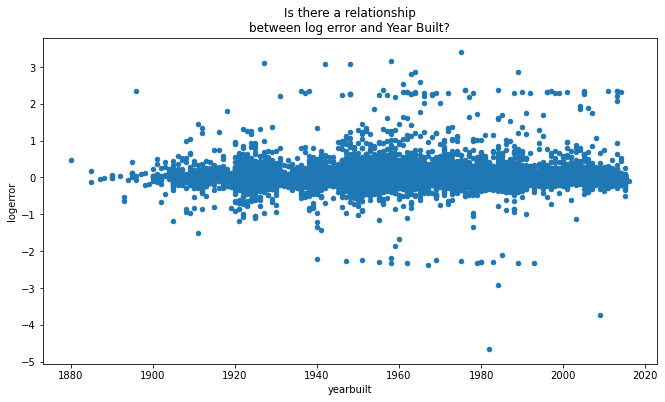

In [12]:
train.plot.scatter(
    x="yearbuilt",
    y="logerror",
    title='Is there a relationship\nbetween log error and Year Built?',
    figsize=(11, 6),
)
plt.show()

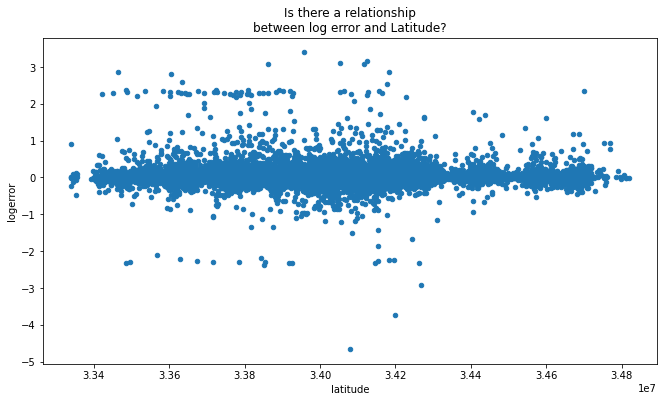

In [10]:
train.plot.scatter(
    x="latitude",
    y="logerror",
    title='Is there a relationship\nbetween log error and Latitude?',
    figsize=(11, 6),
)
plt.show()

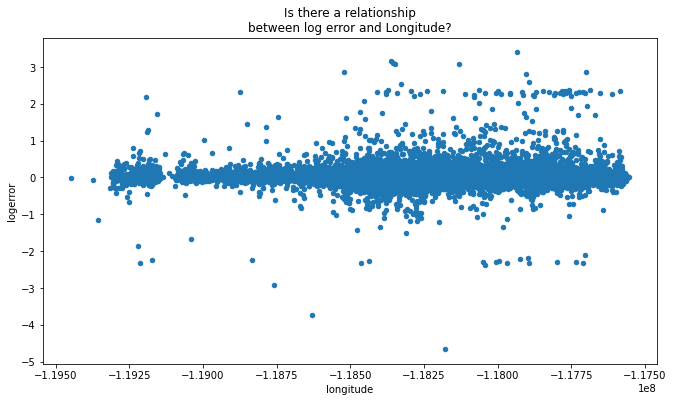

In [11]:
train.plot.scatter(
    x="longitude",
    y="logerror",
    title='Is there a relationship\nbetween log error and Longitude?',
    figsize=(11, 6),
)
plt.show()

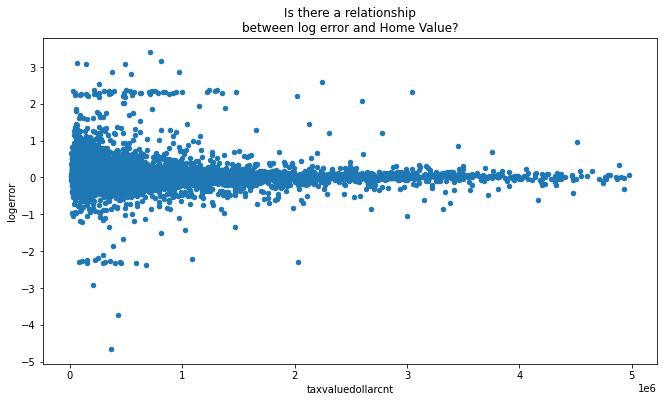

In [13]:
train.plot.scatter(
    x="taxvaluedollarcnt",
    y="logerror",
    title='Is there a relationship\nbetween log error and Home Value?',
    figsize=(11, 6),
)
plt.show()

In [4]:
train, validate, test = wr.train_validate_test_split(zillow)
print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  680032
validate observations:  226688
test observations:  226688


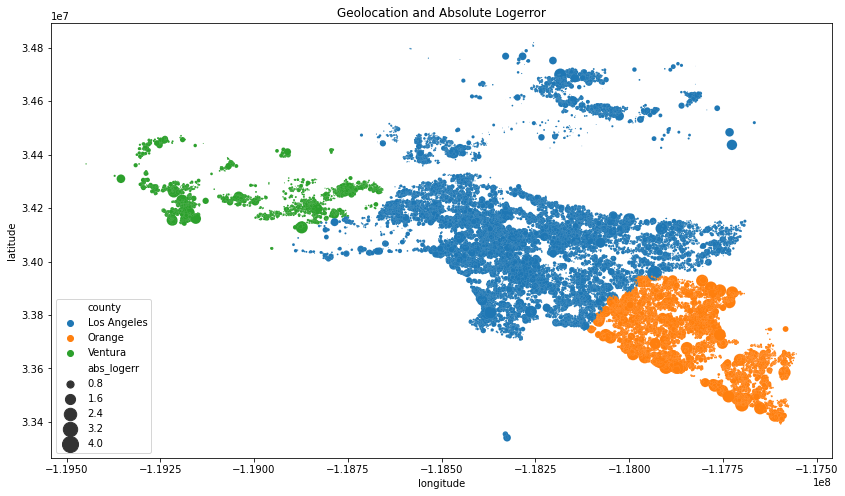

In [6]:
train['abs_logerr'] = train.logerror.apply(lambda x: x if x >= 0 else -x)
# Plot of error using lat/long
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()